## 使用Keras 分類 Iris

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
X.shape

(150, 4)

In [3]:
y.shape

(150,)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [0]:
#X_scaled

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential() 
# Dense: x * w + b 
model.add(tf.keras.layers.Dense(units = 5,  activation = 'relu', input_dim = 4))
model.add(tf.keras.layers.Dense(units = 3))

In [0]:
model = tf.keras.models.Sequential( [
# Dense: x * w + b 
tf.keras.layers.Dense(units = 5,  activation = 'relu', input_dim = 4),
tf.keras.layers.Dense(units = 3)
])

- 如果目標資料是 one-hot 編碼, 使用 categorical_crossentropy.

```
one-hot 編碼範例:
[1,0,0]
[0,1,0]
[0,0,1]
```

- 如果目標是整數 integers,使用sparse_categorical_crossentropy

```
整數範例
1
2
3
```

In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_fn,
                  optimizer='sgd',
                  metrics=['accuracy'])

In [0]:
history = model.fit(X_scaled, y,
                    batch_size = 30,
                    epochs=1000,
                    verbose=0)

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

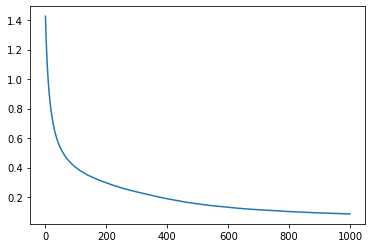

In [13]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('loss'))), history.history.get('loss'))

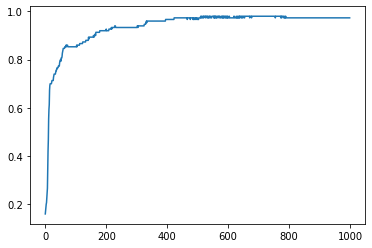

In [14]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('accuracy'))), history.history.get('accuracy'))

In [0]:
import numpy as np
y_pred = np.argmax(model(X_scaled).numpy(), axis = 1)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9733333333333334

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [0]:
n_classes  = 3
y_onehot = tf.keras.utils.to_categorical(iris.target, n_classes)

In [0]:
model2 = tf.keras.models.Sequential( [
# Dense: x * w + b 
tf.keras.layers.Dense(units = 5,  activation = 'relu', input_dim = 4),
tf.keras.layers.Dense(units = 3, activation='softmax')
])

In [0]:
model2.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])

In [21]:
history = model2.fit(X_scaled, y_onehot,
                    batch_size = 30,
                    epochs=10,
                    verbose=1)

Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 1.0938 - accuracy: 0.3467
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 1.0158 - accuracy: 0.4933
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.9536 - accuracy: 0.6533
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.9058 - accuracy: 0.7133
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.8683 - accuracy: 0.7267
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.8380 - accuracy: 0.7600
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.8129 - accuracy: 0.7667
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.7918 - accuracy: 0.7733
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.7738 - accuracy: 0.7800
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.7582 - accuracy: 0.7867


## 客戶流失分析

### 資料讀取

In [22]:
import pandas
df = pandas.read_csv('https://github.com/ywchiu/tibamedl/raw/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


### 資料預處理

In [23]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [0]:
# 根據位置篩選資料 .iloc[列,欄]
df = df.iloc[:,3:]

In [25]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [0]:
# 建立虛擬變量 (create dummy variable)
house = pandas.DataFrame([{'區域':'大安區'},
                      {'區域':'中山區'},
                      {'區域':'大同區'},
                      {'區域':'中山區'},
                      {'區域':'大安區'}])

In [27]:
area = pandas.get_dummies(house['區域'])
del area['中山區']
area
#house

,大同區,大安區
0,0,1
1,0,0
2,1,0
3,0,0
4,0,1


In [28]:
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].replace({'yes': 1, 'no': 0})
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [0]:
# 今天天氣真好
# 今天會下大雨

# 今天 天氣 真好 會 下大雨
#  1   1    1   0    0
#  1   0    0   1    1

In [0]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

### 切訓練與測試資料集

In [0]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.33, random_state = 123 )

In [32]:
x.shape, y.shape

((3333, 16), (3333,))

In [33]:
train_x.shape, train_y.shape

((2233, 16), (2233,))

In [34]:
test_x.shape, test_y.shape

((1100, 16), (1100,))

In [35]:
y.value_counts()

0    2850
1     483
Name: churn, dtype: int64

### 資料標準化

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

### 建立模型

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([                                 
  tf.keras.layers.Dense(8, activation='relu', input_dim = 16),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(train_x, train_y,
          batch_size=30,
          epochs=100,
          verbose = 0,
          validation_data=(test_x, test_y))

In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

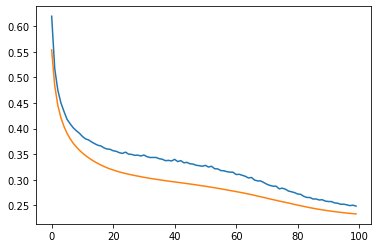

In [43]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('loss'))), history.history.get('loss'))
plt.plot(range(len(history.history.get('val_loss'))), history.history.get('val_loss'))

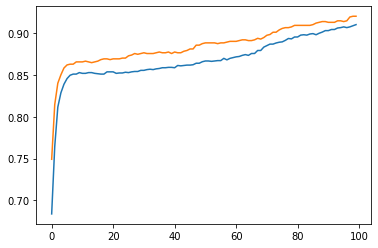

In [44]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('accuracy'))), history.history.get('accuracy'))
plt.plot(range(len(history.history.get('val_accuracy'))), history.history.get('val_accuracy'))

###評估預測結果

In [0]:
predictions = model(test_x).numpy()

In [46]:
predictions

array([[0.65699077],
       [0.06301373],
       [0.04085723],
       ...,
       [0.03843337],
       [0.00483719],
       [0.05941717]], dtype=float32)

In [0]:
pred_y = (predictions > 0.5)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_y )

0.92

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, pred_y )
cm

array([[936,  14],
       [ 74,  76]])

In [50]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       950
           1       0.84      0.51      0.63       150

    accuracy                           0.92      1100
   macro avg       0.89      0.75      0.79      1100
weighted avg       0.92      0.92      0.91      1100



## 選擇優化器

In [51]:
import pandas
df = pandas.read_csv('https://github.com/ywchiu/tibamedl/raw/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [0]:
df = df.iloc[:,3:]
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
def tarinProcess(optimizer):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
    model.add(tf.keras.layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=30,
                        epochs=100,
                        verbose=0,
                        validation_data=(x_test, y_test))
    return history

In [0]:
history1 = tarinProcess('sgd')

In [0]:
history2 = tarinProcess('RMSprop')

In [0]:
history3 = tarinProcess('Adagrad')

In [0]:
history4 = tarinProcess('Adadelta')

In [0]:
history5 = tarinProcess('Adam')

In [63]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

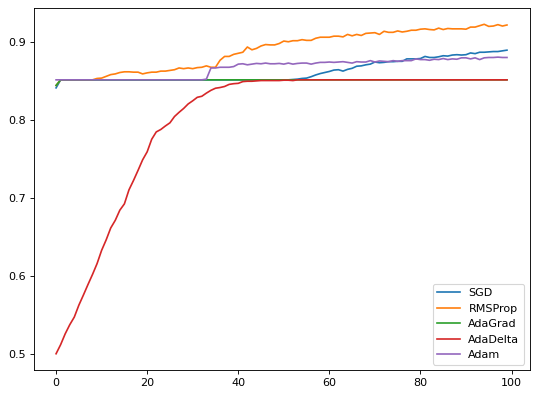

In [64]:
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history1.epoch, history1.history.get('accuracy'), label='SGD')
plt.plot(history2.epoch, history2.history.get('accuracy'), label='RMSProp')
plt.plot(history3.epoch, history3.history.get('accuracy'), label='AdaGrad')
plt.plot(history4.epoch, history4.history.get('accuracy'), label='AdaDelta')
plt.plot(history5.epoch, history5.history.get('accuracy'), label='Adam')
plt.legend()
plt.show()

##k-fold cross validation

In [65]:
import pandas
df = pandas.read_csv('https://github.com/ywchiu/tibamedl/raw/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [0]:
df = df.iloc[:,3:]
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
def buildClassifier(optimizer):
  model = tf.keras.models.Sequential([                                 
  tf.keras.layers.Dense(8, activation='relu', input_dim = 16),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = buildClassifier, 
                                                            batch_size = 30, 
                                                            epochs = 100, 
                                                            verbose = 0, 
                                                            optimizer = 'adam')
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5)

In [74]:
accuracies

array([0.9194631 , 0.92841166, 0.92617452, 0.92376679, 0.92825115])

In [75]:
accuracies.mean()

0.9252134442329407

In [76]:
accuracies.std()

0.0033328424557579747

In [0]:
def buildClassifierWithDropout(optimizer):
  model = tf.keras.models.Sequential([                                 
  tf.keras.layers.Dense(8, activation='relu', input_dim = 16),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [0]:

classifier2 = tf.keras.wrappers.scikit_learn.KerasClassifier(
    build_fn = buildClassifierWithDropout, 
    batch_size = 30, 
    epochs = 100, 
    verbose = 0, 
    optimizer='adam' )


In [0]:
accuracies2 = cross_val_score(estimator = classifier2, X = x_train, y = y_train, cv = 5)

In [80]:
accuracies.mean(),accuracies2.mean()

(0.9252134442329407, 0.9059349298477173)

In [81]:
accuracies.std(),accuracies2.std()

(0.0033328424557579747, 0.0286291935516392)

Regularization (正則化)

In [0]:
?tf.keras.layers.Dense

In [0]:
 def buildClassifierWithRegularizer(optimizer):
  model = tf.keras.models.Sequential([                                 
  tf.keras.layers.Dense(8, activation='relu', input_dim = 16),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(8, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [0]:

classifier3 = tf.keras.wrappers.scikit_learn.KerasClassifier(
    build_fn = buildClassifierWithRegularizer, 
    batch_size = 30, 
    epochs = 100, 
    verbose = 0, 
    optimizer='adam' )


In [0]:
from sklearn.model_selection import cross_val_score
accuracies3 = cross_val_score(estimator = classifier3, X = x_train, y = y_train, cv = 5)

In [86]:
accuracies3

array([0.91275167, 0.92617452, 0.90156597, 0.91255605, 0.92600894])

##Grid Search

In [87]:
from sklearn.model_selection import GridSearchCV
classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(
    build_fn = buildClassifierWithDropout, 
    epochs = 10,verbose = 0)
parameters = {'batch_size': [10, 15],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2)
grid_search     = grid_search.fit(x_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy   = grid_search.best_score_

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [88]:
best_parameters

{'batch_size': 10, 'optimizer': 'adam'}

In [89]:
best_accuracy

0.8683445480886784

In [90]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
iris = load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                               random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                      penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(iris.data, iris.target)
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

##比較機器學習模型

In [91]:
import pandas
df = pandas.read_csv('https://github.com/ywchiu/tibamedl/raw/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [0]:
df = df.iloc[:,3:]
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 8,  activation = 'relu', input_dim = 16))
model.add(tf.keras.layers.Dense(units = 8,  activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1,  activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

history = model.fit(x_train, y_train,
                        batch_size=30,
                        epochs=300,
                        verbose=0,
                        validation_data=(x_test, y_test))

In [98]:
predictions = model(x_test).numpy()
predictions

array([[0.8941326 ],
       [0.04370371],
       [0.03656575],
       ...,
       [0.00134109],
       [0.00535318],
       [0.13538672]], dtype=float32)

In [0]:
y_pred = (predictions > 0.5)

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred )

0.9281818181818182

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred )

In [102]:
cm

array([[932,  18],
       [ 61,  89]])

In [0]:
TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]

In [104]:
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
TPR, FPR

(0.9385699899295066, 0.16822429906542055)

In [105]:
import numpy as np
TPR_ary = [1]
FPR_ary = [1]
for cutoff in np.arange(0,1,0.1):
  y_pred = (predictions > cutoff)
  cm = confusion_matrix(y_test, y_pred )
  TP = cm[0,0]
  FP = cm[0,1]
  FN = cm[1,0]
  TN = cm[1,1]
  TPR = TP / (TP + FN)
  FPR = FP / (FP + TN)
  if pandas.notnull(TPR) and pandas.notnull(FPR): 
    TPR_ary.append(TPR)
    FPR_ary.append(FPR)
TPR_ary.append(0)
FPR_ary.append(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


In [106]:
TPR_ary

[1,
 0.9656398104265402,
 0.9591611479028698,
 0.9534391534391534,
 0.9512953367875647,
 0.9385699899295066,
 0.935129740518962,
 0.9288537549407114,
 0.9289940828402367,
 0.918525703200776,
 0]

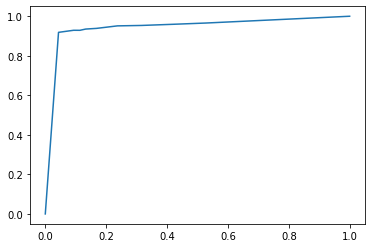

In [107]:
from matplotlib import pyplot as plt
plt.plot(FPR_ary, TPR_ary)

In [0]:
from sklearn.metrics import roc_curve
fpr_ary, tpr_ary, thresholds = roc_curve(y_test, predictions)

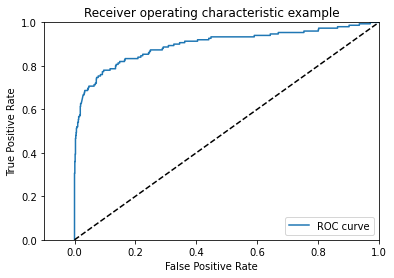

In [109]:
import matplotlib.pyplot as plt
plt.plot(fpr_ary, tpr_ary, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [110]:
from sklearn.metrics import auc
auc(fpr_ary, tpr_ary)


0.8980982456140351

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(x_train, y_train)

clf2 = SVC(probability = True)
clf2.fit(x_train, y_train)

clf3 = LogisticRegression()
clf3.fit(x_train, y_train)

clf4 = RandomForestClassifier()
clf4.fit(x_train, y_train)

clf5 = GradientBoostingClassifier()
clf5.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

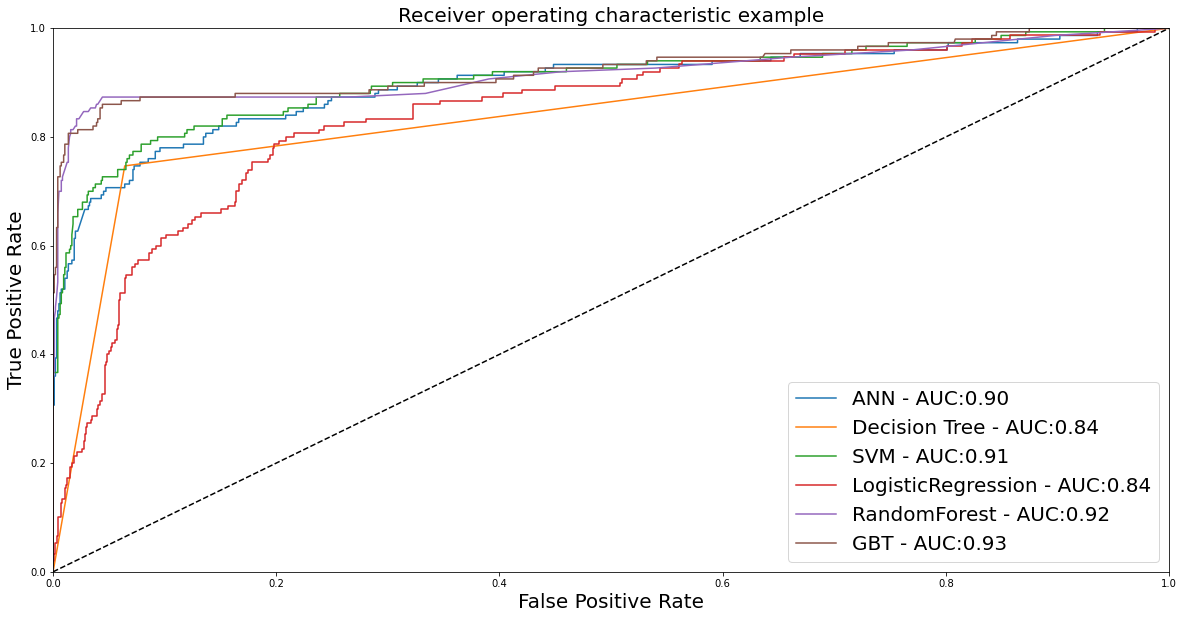

In [112]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize= [20,10])
for clf, title in zip([model,clf1,clf2,clf3, clf4,clf5], 
                      ['ANN','Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest', 'GBT']):
    if title != 'ANN':
        probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    else:
        y_pred = clf.predict(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## 使用ANN 做物件辨識

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [114]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

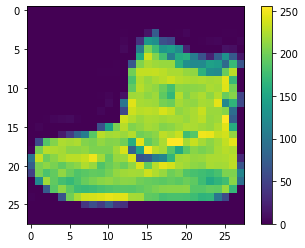

In [116]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

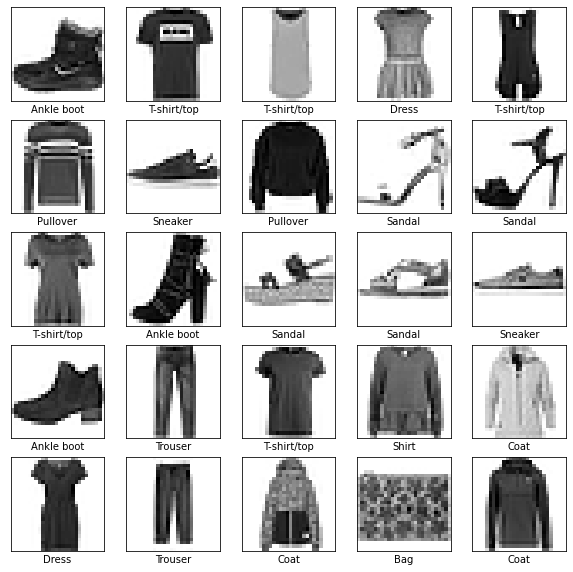

In [118]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [121]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5033 - accuracy: 0.8227
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3795 - accuracy: 0.8633
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3389 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3160 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2816 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2684 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2580 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2477 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [122]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3384 - accuracy: 0.8837

Test accuracy: 0.8837000131607056


In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [124]:
predictions

array([[2.3392833e-07, 3.6850342e-11, 3.6836695e-08, ..., 2.8316970e-03,
        5.3158451e-09, 9.9663192e-01],
       [7.9112426e-05, 3.4061439e-15, 9.9963248e-01, ..., 2.7298961e-15,
        6.7118633e-10, 2.3955859e-14],
       [1.1930050e-08, 1.0000000e+00, 2.1116318e-12, ..., 7.0990687e-25,
        1.1397338e-11, 6.0846129e-23],
       ...,
       [2.4297738e-05, 2.9099112e-11, 2.1655831e-05, ..., 6.6726216e-09,
        9.9994040e-01, 6.4147732e-12],
       [6.4125646e-07, 9.9996161e-01, 8.2136529e-09, ..., 5.6317222e-17,
        2.3879305e-09, 8.7162916e-14],
       [7.1362405e-07, 4.2687462e-10, 1.9431725e-07, ..., 1.4463166e-04,
        7.0691181e-06, 3.2035115e-07]], dtype=float32)

In [0]:
import numpy as np
y_pred = np.argmax(predictions,axis = 1)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

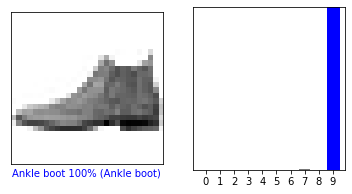

In [127]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

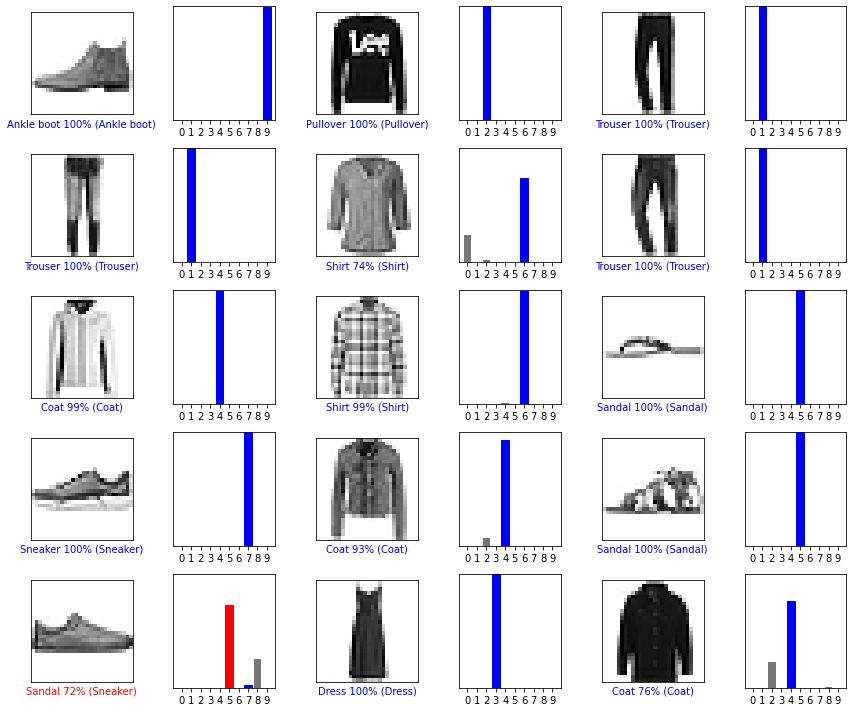

In [128]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

使用CNN 做手寫辨識

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [130]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [131]:
train_images.shape

(60000, 28, 28)

In [132]:
test_images.shape

(10000, 28, 28)

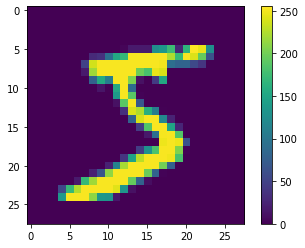

In [133]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
classifier = tf.keras.Sequential()
# 1. Convolution
classifier.add(tf.keras.layers.Conv2D(filters=16, 
                                      kernel_size=(3, 3), 
                                      padding = 'same', 
                                      input_shape = (28, 28, 1), 
                                      activation = 'relu'))

# 2. Max Pooling
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# 3. Flattening
classifier.add(tf.keras.layers.Flatten())

# 4. Fully Connection
classifier.add(tf.keras.layers.Dense(units = 128, activation = 'relu')) 
classifier.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))


In [137]:
classifier.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_95 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_96 (Dense)             (None, 10)                1290      
Total params: 402,986
Trainable params: 402,986
Non-trainable params: 0
_________________________________________________________________


In [0]:
classifier.compile(optimizer = 'adam', 
                   loss ='categorical_crossentropy', 
                   metrics = ['accuracy'])

In [139]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=5,
                    verbose=1,
                    validation_data=(test_images, test_labels))

Epoch 1/5
600/600 [==============================] - 2s 4ms/step - loss: 0.4207 - accuracy: 0.8878 - val_loss: 0.1883 - val_accuracy: 0.9434
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1652 - accuracy: 0.9522 - val_loss: 0.1432 - val_accuracy: 0.9567
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1266 - accuracy: 0.9634 - val_loss: 0.1228 - val_accuracy: 0.9624
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1013 - accuracy: 0.9703 - val_loss: 0.1113 - val_accuracy: 0.9663
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0845 - accuracy: 0.9752 - val_loss: 0.0995 - val_accuracy: 0.9710


## 使用CNN 做時尚數據辨識

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

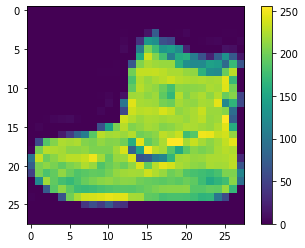

In [141]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
classifier = tf.keras.Sequential()
# 1. Convolution
classifier.add(tf.keras.layers.Conv2D(filters=16, 
                                      kernel_size=(3, 3), 
                                      padding = 'same', 
                                      input_shape = (28, 28, 1), 
                                      activation = 'relu'))

# 2. Max Pooling
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# 3. Flattening
classifier.add(tf.keras.layers.Flatten())

# 4. Fully Connection
classifier.add(tf.keras.layers.Dense(units = 128, activation = 'relu')) 
classifier.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))


In [0]:
classifier.compile(optimizer = 'adam', 
                   loss ='categorical_crossentropy', 
                   metrics = ['accuracy'])

In [0]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=100,
                    verbose=0,
                    validation_data=(test_images, test_labels))

In [147]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.7131 - accuracy: 0.8835

Test accuracy: 0.8834999799728394


In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [0]:
test_images2 = test_images.reshape((10000,28,28))

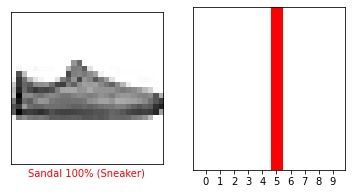

In [151]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images2)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


## 獲取明星圖片

In [152]:
!  pip install google_images_download

     |████████████████████████████████| 911kB 4.1MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=1eacf8c23876388b8eb67b5391e4078edfe632397c3ddb7c78dd35d0b28bf923
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [153]:
! googleimagesdownload -k "北极熊" -l 50


Item no.: 1 --> Item name = \u5317\u6781\u718a
Evaluating...
Starting Download...


Unfortunately all 50 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0


Everything downloaded!
Total errors: 0
Total time taken: 0.8499801158905029 Seconds


In [0]:
import requests
from bs4 import BeautifulSoup
google_url = 'https://www.google.com/search?ei=gAhqXciWMbCSr7wPgLaqiAE&yv=3&tbm=isch&q={}&vet=10ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB.gAhqXciWMbCSr7wPgLaqiAE.i&ved=0ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_jsfs:Ffpdje,_fmt:pc'
res = requests.get(google_url.format('翁滋蔓', 0))
soup = BeautifulSoup(res.text, 'lxml' )

In [155]:
for alink in soup.select('a img'):
    if alink.get('src'):
        print(alink.get('src'))
        print('======================')

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ45QtaKPW6-SyFa8D--GdF5_CwJ7hz6Ux5O7t6eKrD3qKn9tEh_Q&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEDrORxH2aOaahP1QKG_vWQmQQKwTdADza7uQ43EaD6SlUsRfdeg&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBrz9X3hzdoLS-rVUYjBPH09xBLT04xl-tiHm0rsPzvKb3Kf2J&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjTMwJS9SMMJEFLwf6E99lsaV6QB4vXQSaHs4f1YUTns2p4d0fYQ&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTO-cVVVmzg-pbc3L9JHC8xTxI42ARmVOzjqjh_fhzRwnggqP1aLw&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTUH8jC79TMe0vB-s5AUFlYhpe-iIRV76FYmwiIXrudT4KveHVN1A&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_Fb8aGyxS1vgEN0aWwziQ6WXZU7xOB-S1C-wVctr3VARF_Yz0&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQszn0FaKGlOi_iZzm5UVX-PAbm0tezlkqw2jsO_FWzZoNT0Gz&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSSXxrzw3UHLkgpTPQmOz9plEs2hjFwrbzSWV35vtXql5lyyZum&s
https://encrypted-tbn0.gsta

In [0]:
def getPicture(path, url):
    res = requests.get(url)
    with open('{}/{}.jpg'.format(path, url.split('tbn:')[1]) , 'wb') as f:
        f.write(res.content)

In [0]:
import requests
import os
from bs4 import BeautifulSoup
google_url = 'https://www.google.com/search?ei=gAhqXciWMbCSr7wPgLaqiAE&yv=3&tbm=isch&q={}&vet=10ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB.gAhqXciWMbCSr7wPgLaqiAE.i&ved=0ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_jsfs:Ffpdje,_fmt:pc'

def getIdolImage(path, term, pagenum):
    if not os.path.exists(path):
        os.mkdir(path)
    for p in range(pagenum):
        res = requests.get(google_url.format(term, p* 100))
        soup = BeautifulSoup(res.text, 'lxml' )
        for alink in soup.select('a img'):
            if alink.get('src'):
                getPicture(path, alink.get('src'))

In [0]:
getIdolImage('zhiyu','周子瑜', 10)

In [0]:
getIdolImage('mm','翁滋蔓', 10)

In [0]:
getIdolImage('puff','郭雪芙', 10)

## 使用OpenCV 擷取人臉部分

In [0]:
import cv2 as cv

In [162]:
from PIL import Image
im = Image.open('//content/zhiyu/ANd9GcQ0jkg92jzLtEGY4GgvO-WNcWpwggOusYgoQbLPsoCqwybHg2eD&s.jpg')
im

FileNotFoundError: ignored

In [0]:
! wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

In [0]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv.imread('//content/zhiyu/ANd9GcQ0jkg92jzLtEGY4GgvO-WNcWpwggOusYgoQbLPsoCqwybHg2eD&s.jpg')
img.shape

In [0]:
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces

In [0]:
x,y,w,h = faces[0]

In [0]:
box = (x, y, x+w, y+h)

In [0]:
crpim = im.crop(box).resize((64,64))

In [0]:
crpim

In [0]:

face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

def cropIdolFace(src, dest):
    if not os.path.exists(dest):
        os.mkdir(dest)
    for filename in os.listdir(src):
        img = cv.imread(src + filename)
        faces = face_cascade.detectMultiScale(img, 1.3, 5)
        if len(faces) == 1:
            im      = Image.open(src + filename)
            x,y,w,h = faces[0]
            box     = (x, y, x+w, y+h)
            crpim   = im.crop(box).resize((64,64))
            crpim.save(dest + filename)

In [0]:
cropIdolFace('zhiyu/', 'zhiyu_face/')

In [0]:
cropIdolFace('mm/', 'mm_face/')

In [0]:
cropIdolFace('puff/', 'puff_face/')

## 使用 CNN 建立人臉識別模型

In [0]:
# Initialising the CNN
classifier = tf.keras.Sequential()

# Convolution
classifier.add(tf.keras.layers.Conv2D(filters=32, 
                                      kernel_size=(3, 3), 
                                      padding = 'same',
                                      input_shape = (64, 64, 3), 
                                      activation = 'relu'))
# Max Pooling
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(tf.keras.layers.Conv2D(filters=32, 
                                      kernel_size=(3, 3), 
                                      padding = 'same', 
                                      activation = 'relu'))
# Max Pooling
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(tf.keras.layers.Flatten())

# Fully Connected
classifier.add(tf.keras.layers.Dense(units = 128, activation = 'relu')) 
classifier.add(tf.keras.layers.Dropout(rate=0.1)) 
classifier.add(tf.keras.layers.Dense(units = 128, activation = 'relu')) 
classifier.add(tf.keras.layers.Dropout(rate=0.1)) 
classifier.add(tf.keras.layers.Dense(units = 3, activation = 'softmax'))


In [0]:
classifier.summary()

In [0]:
classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

## 圖像增廣技術

In [0]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
                                   zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
                                   horizontal_flip = True #水平翻转操作
                                  )

In [0]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

## 將資料分為訓練與測試資料集

In [0]:
import os
if not os.path.exists('train/'):
    os.mkdir('train/')
if not os.path.exists('test/'):
    os.mkdir('test/')

In [0]:
import os
from sklearn.model_selection import train_test_split

def splitDataset(dirs):
    dataset = list(os.listdir(dirs))
    train_data, test_data = train_test_split(dataset, test_size= 0.2, random_state = 42)
    
    if not os.path.exists('train/'+dirs):
        os.mkdir('train/'+dirs)
    if not os.path.exists('test/'+dirs):
        os.mkdir('test/'+dirs)

    for f in train_data:
        os.rename(dirs + f, 'train/'+ dirs + f)
    for f in test_data:
        os.rename(dirs + f, 'test/' + dirs +f)

In [0]:
splitDataset('puff_face/')

In [0]:
splitDataset('zhiyu_face/')

In [0]:
splitDataset('mm_face/')

In [0]:
training_set = train_datagen.flow_from_directory(
    'train/', target_size = (64, 64),
     batch_size = 16,
     class_mode = 'categorical')

In [0]:
test_set = test_datagen.flow_from_directory(
    'test/', target_size = (64, 64),
    batch_size = 30, 
    class_mode = 'categorical')

In [0]:
history = classifier.fit_generator(training_set,
                         epochs=10,
                         validation_steps=16,
                         verbose = 1,
                         validation_data = test_set)

In [0]:
! wget https://attach.setn.com/newsimages/2018/09/06/1531445-XXL.jpg

In [0]:
img = cv.imread('1531445-XXL.jpg')
img.shape

In [0]:
faces = face_cascade.detectMultiScale(img, 1.3, 5)

In [0]:
faces

In [0]:
from PIL import Image
im = Image.open('1531445-XXL.jpg')
x,y,w,h = faces[0]
box     = (x, y, x+w, y+h)
crpim   = im.crop(box).resize((64,64))
crpim

In [0]:
crpim.save('predict_face.jpg')

In [0]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('predict_face.jpg', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image.shape

In [0]:
test_image = np.expand_dims(test_image, axis = 0)
test_image.shape

In [0]:
classifier.predict_classes(test_image)

In [0]:
training_set.class_indices

### 作業

- 目標: 建立一深度學習模型預測客戶是否流失
- 問題一: 請將資料區分為訓練與測試資料集
- 問題二: 請將資料標準化
- 問題三: 使用Keras 建立深度學習模型預測客戶是否流失
- 問題四: 評估模型準確度
- 問題五: 請繪製ROC Curve, 並求出 AUC
- 問題六: 請比較 ANN, SVM, Gradient Boosting, Random Forest, Logist Regression, Decision Tree 各模型的 AUC 與 ROC Curve

In [0]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv', header = 0 )
df.head()